In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import functools




In [2]:
# Data file paths
alcohol_path = "data (1).csv"
happiness_path = "2018.csv"
hdi_path = "2018 Human Development Index (HDI).csv"
gdp_path = "GDP per capita (2017 PPP $).csv"
life_path = "Life expectancy at birth (years).csv"

# Output file
output_data_file = "output_data/alcohol_vs_happiness.csv"

# Read the data files
alcohol_data = pd.read_csv(alcohol_path)
happiness_data = pd.read_csv(happiness_path)
hdi_data = pd.read_csv(hdi_path, skiprows=5, encoding="cp1252")
gdp_data = pd.read_csv(gdp_path, encoding="cp1252", skiprows=5)
life_data = pd.read_csv(life_path, encoding="cp1252", skiprows=6)


In [3]:
# Grab 2018 data, clean and merge HDI, GDP and Life Expectancy 
clean_gdp_data = gdp_data[["Country", "2018"]]
gdp_hdi = clean_gdp_data.merge(hdi_data, how='inner', on=["Country"])
final_gdp_hdi = gdp_hdi.rename(columns={"2018_x": "GDP (per capita PPP)", "2018_y": "HDI"})
clean_life_data = life_data[["Country", "2018"]]
clean_life_data = clean_life_data.rename(columns={"2018": "Life Expectancy"})
final_hdi_gdp_life = final_gdp_hdi.merge(clean_life_data, how='inner', on=["Country"])
#final_hdi_gdp_life = final_hdi_gdp_life.dropna()
final_hdi_gdp_life = final_hdi_gdp_life.iloc[:-25]
final_hdi_gdp_life.dtypes

Country                 object
GDP (per capita PPP)    object
HDI Rank                object
HDI                     object
Life Expectancy         object
dtype: object

In [4]:
final_hdi_gdp_life[["GDP (per capita PPP)", "HDI Rank", "HDI", "Life Expectancy"]] = final_hdi_gdp_life[["GDP (per capita PPP)", "HDI Rank", "HDI", "Life Expectancy"]].astype(float)
final_hdi_gdp_life.dtypes


Country                  object
GDP (per capita PPP)    float64
HDI Rank                float64
HDI                     float64
Life Expectancy         float64
dtype: object

In [5]:
final_hdi_gdp_life = final_hdi_gdp_life.sort_values(by='GDP (per capita PPP)', ascending=False)
final_hdi_gdp_life.to_csv(output_data_file, encoding="utf8")
final_hdi_gdp_life["Country"] = final_hdi_gdp_life["Country"].str.strip()
final_hdi_gdp_life

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy
97,Luxembourg,114110.0,23.0,0.913,82.1
149,Singapore,97745.0,11.0,0.936,83.5
135,Qatar,94503.0,45.0,0.845,80.1
78,Ireland,83471.0,2.0,0.951,82.1
159,Switzerland,68479.0,2.0,0.955,83.6
...,...,...,...,...,...
120,Niger,1196.0,189.0,0.391,62.0
38,Congo (Democratic Republic of the),1086.0,175.0,0.478,60.4
99,Malawi,1043.0,174.0,0.478,63.8
31,Central African Republic,933.0,188.0,0.395,52.8


In [6]:
# Clean World Happiness Report
happiness_final = happiness_data.rename(columns={"Country or region": "Country"})
happiness_final

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [7]:
# Clean, pivot and reorganize alcohol data
alcohol_df = alcohol_data.drop([0])
alcohol_results = alcohol_df.pivot_table('Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)', 
                                           ["Unnamed: 0", "Unnamed: 1"], 'Unnamed: 2')                              
alcohol = pd.DataFrame(alcohol_results.to_records())
alcohol_set = alcohol[["Unnamed: 0", "All types", "Beer", "Spirits", "Wine", "Other alcoholic beverages"]]
alcohol_final = alcohol_set.rename(columns={"Unnamed: 0": "Country", "Other alcoholic beverages": "Other"})
alcohol_final

,Country,All types,Beer,Spirits,Wine,Other
0,Afghanistan,0.01,0.00,0.01,0.00,0.00
1,Albania,4.70,1.60,1.72,1.30,0.08
2,Algeria,0.58,0.30,0.10,0.18,0.00
3,Andorra,9.75,3.66,2.31,3.69,0.00
4,Angola,5.35,3.64,0.99,0.64,0.08
...,...,...,...,...,...,...
183,Venezuela (Bolivarian Republic of),2.84,1.86,0.84,0.10,0.04
184,Viet Nam,3.22,2.96,0.23,0.03,0.00
185,Yemen,0.03,0.03,0.00,0.00,0.00
186,Zambia,3.95,1.15,0.62,0.08,2.10


In [8]:
# Combine World Happiness Report and WHO alcohol data
happiness_alcohol = happiness_final.merge(alcohol_final, how='inner', on=["Country"])

# Display the data table for preview
happiness_alcohol["Country"] = happiness_alcohol["Country"].str.strip()

happiness_alcohol


,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,All types,Beer,Spirits,Wine,Other
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,8.37,3.97,1.10,1.72,1.58
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,6.02,2.66,0.97,2.20,0.19
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,9.31,3.45,1.65,4.22,0.00
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,7.72,4.39,1.22,2.11,0.00
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,9.51,3.17,1.65,4.23,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030,3.55,0.37,3.11,0.05,0.02
128,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,6.99,1.06,0.04,0.01,5.88
129,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,0.03,0.03,0.00,0.00,0.00
130,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,0.88,0.51,0.03,0.02,0.32


In [9]:
final_results = final_hdi_gdp_life.merge(happiness_alcohol, how="inner", on=["Country"])
final_results

,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,All types,Beer,Spirits,Wine,Other
0,Luxembourg,114110.0,23.0,0.913,82.1,17,6.910,1.576,1.520,0.896,0.632,0.196,0.321,10.94,4.03,2.21,4.70,0.00
1,Singapore,97745.0,11.0,0.936,83.5,34,6.343,1.529,1.451,1.008,0.631,0.261,0.457,1.85,1.25,0.27,0.30,0.04
2,Qatar,94503.0,45.0,0.845,80.1,32,6.374,1.649,1.303,0.748,0.654,0.256,0.171,1.02,0.30,0.64,0.08,0.01
3,Ireland,83471.0,2.0,0.951,82.1,14,6.977,1.448,1.583,0.876,0.614,0.307,0.306,11.20,5.12,2.32,2.90,0.85
4,Switzerland,68479.0,2.0,0.955,83.6,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,9.51,3.17,1.65,4.23,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Mozambique,1290.0,181.0,0.452,60.2,123,4.417,0.198,0.902,0.173,0.531,0.206,0.158,1.24,1.00,0.21,0.03,0.01
126,Niger,1196.0,189.0,0.391,62.0,134,4.166,0.131,0.867,0.221,0.390,0.175,0.099,0.13,0.04,0.07,0.02,0.00
127,Malawi,1043.0,174.0,0.478,63.8,147,3.587,0.186,0.541,0.306,0.531,0.210,0.080,2.00,0.17,0.19,0.02,1.61
128,Central African Republic,933.0,188.0,0.395,52.8,155,3.083,0.024,0.000,0.010,0.305,0.218,0.038,0.88,0.51,0.03,0.02,0.32


In [10]:
all_types_df = final_results[['Country',
                              'All types',
                              'Beer',
                              'Spirits',
                              'Wine',
                              'Other']]

# get min and max of all types
all_types_max = all_types_df['All types'].max()
all_types_min = all_types_df['All types'].min()
print(f'max: {all_types_max}')
print(f'min: {all_types_min}')

# find range of all types
all_types_range = all_types_max - all_types_min
print(f'range: {all_types_range}')

# split range into 3 even groups using an increment
all_types_bin_increments = all_types_range / 3
print(f'increments: {all_types_bin_increments}')

# create all types bins
all_types_bins = [all_types_min,
               all_types_min + all_types_bin_increments,
               all_types_min + (all_types_bin_increments * 2),
               all_types_max]
print(all_types_bins)

# turn bin increments into strings for labels
bin_str_min = str(all_types_min)
bin_str_1 = str(all_types_min + all_types_bin_increments)
bin_str_2 = str(all_types_min + (all_types_bin_increments * 2))
bin_str_max = str(all_types_max)

# create bin labels
all_tyles_bin_labels = [f'Small: ({bin_str_min}-{bin_str_1})',
                        f'Medium: ({bin_str_1}-{bin_str_2})',
                        f'Large: ({bin_str_2}-{bin_str_max})']
print(all_tyles_bin_labels)

# name bin and separate rows into bins
all_types_df['Groups by Total Consumption'] = pd.cut(all_types_df['All types'],all_types_bins, labels=all_tyles_bin_labels, include_lowest=True)
all_types_df

# create group by bin
all_types_grouped_df = all_types_df.groupby('Groups by Total Consumption')
all_types_grouped_df.count()

# calculate averages by category
group_country_count = all_types_grouped_df['Country'].count()
group_avg_all = all_types_grouped_df['All types'].mean()
group_avg_beer = all_types_grouped_df['Beer'].mean()
group_avg_spirits = all_types_grouped_df['Spirits'].mean()
group_avg_wine = all_types_grouped_df['Wine'].mean()
group_avg_other = all_types_grouped_df['Other'].mean()

# create new grouped df
group_avg_df = pd.DataFrame({'Count of Countries': group_country_count,
                             'Average All Types': group_avg_all,
                             'Average Beer': group_avg_beer,
                             'Average Spirits': group_avg_spirits,
                             'Average Wine': group_avg_wine,
                             'Average Other': group_avg_other})

group_avg_df.reset_index(inplace=True)

group_avg_df

max: 12.6
min: 0.0
range: 12.6
increments: 4.2
[0.0, 4.2, 8.4, 12.6]
['Small: (0.0-4.2)', 'Medium: (4.2-8.4)', 'Large: (8.4-12.6)']


/Users/beaujeffrey/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Groups by Total Consumption,Count of Countries,Average All Types,Average Beer,Average Spirits,Average Wine,Average Other
0,Small: (0.0-4.2),66,1.720758,0.708182,0.676667,0.101212,0.234697
1,Medium: (4.2-8.4),38,6.371316,2.807632,1.525263,1.287368,0.924211
2,Large: (8.4-12.6),26,10.513077,3.998077,2.678462,2.991538,0.836154


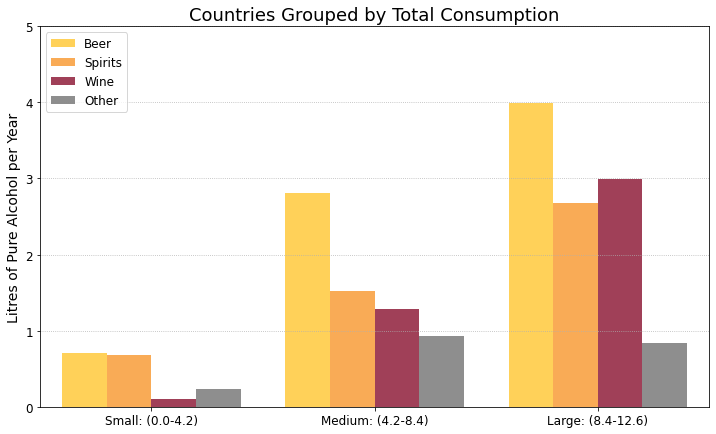

In [22]:
# Setting the positions and width for the bars
pos = list(range(len(group_avg_df['Count of Countries'])))
width = 0.2

# plot bars
fig, ax = plt.subplots(figsize=(12,7))
plt.bar(pos, 
        group_avg_df['Average Beer'], 
        width,
        alpha=0.75, 
        color='#FFC222',
        label=group_avg_df['Groups by Total Consumption'][0]) 

plt.bar([p + width for p in pos], 
        group_avg_df['Average Spirits'],
        width, 
        alpha=0.75, 
        color='#F78F1E', 
        label=group_avg_df['Groups by Total Consumption'][1]) 

plt.bar([p + width*2 for p in pos], 
        group_avg_df['Average Wine'],
        width, 
        alpha=0.75, 
        color='#800020', 
        label=group_avg_df['Groups by Total Consumption'][2])

plt.bar([p + width*3 for p in pos], 
        group_avg_df['Average Other'],
        width, 
        alpha=0.75, 
        color='#696969', 
        label=group_avg_df['Groups by Total Consumption'][2]) 

# format plot
plt.ylabel('Litres of Pure Alcohol per Year', fontsize=14)
plt.title('Countries Grouped by Total Consumption', fontsize=18)
plt.xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(group_avg_df['Groups by Total Consumption'], fontsize=12)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.ylim([0, 5])
plt.legend(['Beer', 'Spirits', 'Wine', 'Other'], loc='upper left', fontsize=12)
plt.grid(linestyle=':', axis='y')

plt.savefig('output_data/groupedbar.png')
plt.show()

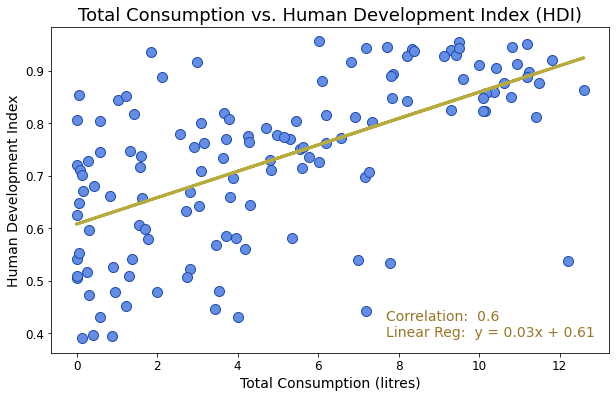

In [26]:
all_alc_x = final_results['All types']
hdi_y = final_results['HDI']

hdi_slope, hdi_int, hdi_r, hdi_p, hdi_std_err = st.linregress(all_alc_x, hdi_y)
hdi_regression = hdi_slope * all_alc_x + hdi_int
hdi_regression_txt = f'y = {str(round(hdi_slope,2))}x + {str(round(hdi_int,2))}'

plt.figure(figsize=(10, 6))
plt.scatter(all_alc_x, hdi_y, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)
plt.plot(all_alc_x, hdi_regression, color='#B8AB3E', linewidth=3)
plt.title(f'Total Consumption vs. Human Development Index (HDI)', fontsize=18)
plt.xlabel('Total Consumption (litres)', fontsize=14)
plt.ylabel('Human Development Index', fontsize=14)
plt.annotate(f'Correlation:  {round(hdi_r, 2)}', xy=(0.60, 0.1), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.annotate(f'Linear Reg:  {hdi_regression_txt}', xy=(0.60, 0.05), xycoords='axes fraction', \
             fontsize=14, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('output_data/hdi_v_all_scatter.png')
plt.show()